In [1]:
%matplotlib inline


# Blocked reduction operations

When gridding data that has been highly oversampled in a direction (shipborne
and airborne data, for example), it is important to decimate the data before
interpolation to avoid aliasing. Class :func:`verde.BlockReduce` decimates
data by applying a reduction operation (mean, median, mode, max, etc) to the
data in blocks. For non-smooth data, like bathymetry, a blocked median filter
is a good choice.


Original data size: 82970
Decimated data size: 1801


/home/m/anaconda3/envs/fatiando-tutorials/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/m/anaconda3/envs/fatiando-tutorials/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/m/anaconda3/envs/fatiando-tutorials/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


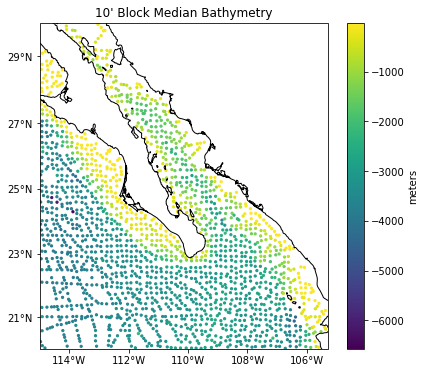

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

import verde as vd

# We'll test this on the Baja California shipborne bathymetry data
data = vd.datasets.fetch_baja_bathymetry()

# Decimate the data using a blocked median with 10 arc-minute blocks
reducer = vd.BlockReduce(reduction=np.median, spacing=10 / 60)
coordinates, bathymetry = reducer.filter(
    (data.longitude, data.latitude), data.bathymetry_m
)
lon, lat = coordinates

print("Original data size:", data.bathymetry_m.size)
print("Decimated data size:", bathymetry.size)

# Make a plot of the decimated data using Cartopy
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_title("10' Block Median Bathymetry")
# Plot the bathymetry as colored circles.
plt.scatter(lon, lat, c=bathymetry, s=5, transform=ccrs.PlateCarree())
plt.colorbar().set_label("meters")
# Use a utility function to setup the tick labels and land feature
vd.datasets.setup_baja_bathymetry_map(ax)
plt.show()